<a href="https://colab.research.google.com/github/ShlokMohanty/SML/blob/visTwo/disease_detection_using_symptoms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle
import re
from googlesearch import search
import warnings
warnings.filterwarnings("ignore")
import requests
from bs4 import BeautifulSoup
import time

In [ ]:
# url = "https://www.dhs.wisconsin.gov/diseases/a-z.htm/"
# diseases=[]

# for letter in "abcdefghijklmnopqrstuvwyz":
#   # Request the page
#   response = requests.get(url + letter)
#   # Parse the HTML content
#   soup = BeautifulSoup(response.content, "html.parser")
#   div_class = "c-acronym-view"
#   div = soup.find("div", class_=div_class)
#   ul_class = "c-views-list c-az-views-list"
#   ul = div.find("ul", class_=ul_class)
#   # Find all <a> tags within the <div> tag
#   a_tags = ul.find_all('a')
#   # Extract the text from each <a> tag
#   for a in a_tags:
#     disease_name = a.get_text(strip=True)
#     diseases.append(disease_name)

# print(diseases)

In [ ]:
# len(diseases)

In [ ]:
diseases_health = []
url = "https://www.health.com/diseases-conditions"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
div_class = "mntl-alphabetical-list__group"
divs = soup.find_all("div", class_=div_class)

for div in divs:
  a_tags = div.find_all('a')
  for a in a_tags:
    disease_name = a.get_text(strip=True)
    diseases_health.append(disease_name)

In [ ]:
print(diseases_health)

['Acid Reflux', 'Acne', "Addison's Disease", 'ADHD', 'Alcohol Use Disorder', 'Allergic Rhinitis', 'Allergy', 'Alopecia', "Alzheimer's Disease", 'Anal Cancer', 'Anaphylaxis', 'Anemia', 'Aneurysm', 'Ankylosing Spondylitis', 'Anorexia', 'Antisocial Personality Disorder', 'Anxiety', 'Appendicitis', 'ARFID', 'Arthritis', 'Asthma', 'Astigmatism', 'Athlete’s Foot', 'Atrial Fibrillation (A-Fib)', 'Autism', 'Autism Spectrum Disorder', 'Autoimmune Disease', 'Axial Spondyloarthritis', 'Bell’s Palsy', 'Bipolar Disorder', 'Bladder Infection', 'Blepharitis', 'Blood Cancer', 'Blood Disorders', 'Body', 'Body Dysmorphia', 'Boil', 'Bone Marrow Cancer', 'Borderline Personality Disorder', 'Botulism', 'Bowel Obstruction', 'Breast Cancer', 'Bronchitis', 'Bulimia', 'C. Diff', 'Cancer', 'Cardiac Arrest', 'Carpal Tunnel Syndrome', 'Cataracts', 'Celiac Disease', 'Cellulitis', 'Cervical Cancer', 'Chlamydia', 'Cholesterol', 'Chronic Fatigue Syndrome', 'Chronic Pain', 'Cirrhosis', 'Cold Sore', 'Colorectal Cancer',

In [ ]:
len(diseases_health)

294

In [ ]:
dis_symp={}

for dis in diseases_health:
  query = dis+' wikipedia'
   # search "disease wilipedia" on google
  for sr in search(query,tld="co.in",stop=10,pause=0.5):
       # open wikipedia link
    match=re.search(r'wikipedia',sr)
    filled = 0
    if match:
      wiki = requests.get(sr,verify=False)
      soup = BeautifulSoup(wiki.content, 'html5lib')
       # Fetch HTML code for 'infobox'
      info_table = soup.find("table", {"class":"infobox"})
      if info_table is not None:
          # Preprocess contents of infobox
        for row in info_table.find_all("tr"):
          data=row.find("th",{"scope":"row"})
          if data is not None:
            data=data.get_text()
            if data=="Symptoms":
              symptom=str(row.find("td"))
              symptom = symptom.replace('.','')
              symptom = symptom.replace(';',',')
              symptom=re.sub(r'<b.*?/b>:',',',symptom) # Remove bold text
              symptom=re.sub(r'<a.*?>','',symptom) # Remove hyperlink
              symptom=re.sub(r'</a>','',symptom) # Remove hyperlink
              symptom=re.sub(r'<[^<]+?>',', ',symptom) # All the tags
              symptom=re.sub(r'\[.*\]','',symptom) # Remove citation text
              symptom=' '.join([x for x in symptom.split() if x != ','])
              dis_symp[dis]=symptom
              filled = 1
              break
    if filled==1:
      break

In [ ]:
print(dis_symp)

{'Acid Reflux': 'Taste of acid, heartburn, bad breath, chest pain, breathing problems,', 'Acne': 'Blackheads, whiteheads, pimples, oily skin, scarring,', "Addison's Disease": 'Abdominal pain, weakness, weight loss, darkening of the skin,', 'ADHD': 'Inattention, hyperactivity, disinhibition, executive dysfunction, emotional dysregulation, impulsivity, impaired working memory,', 'Alcohol Use Disorder': 'Drinking large amounts of alcohol over a long period, difficulty cutting down, acquiring and drinking alcohol taking up a lot of time, usage resulting in problems, withdrawal occurring when stopping,', 'Allergic Rhinitis': 'Stuffy itchy nose, sneezing, red, itchy, and watery eyes, swelling around the eyes, itchy ears,', 'Allergy': 'Red eyes, itchy rash, vomiting, runny nose, shortness of breath, swelling, sneezing, and cough,', 'Alopecia': 'Loss of hair from part of the head or body,', "Alzheimer's Disease": 'Memory loss, problems with language, disorientation, mood swings,', 'Anal Cancer

In [ ]:
# Function to clean disease descriptions
def clean_description(description):
    # Remove HTML/CSS artifacts using regex
    cleaned = re.sub(r'mw-parser-output.*?\{.*?\}', '', description)
    return cleaned

# Clean the entire dataset
cleaned_data = {disease: clean_description(desc) for disease, desc in dis_symp.items()}

In [ ]:
print(cleaned_data)

{'Acid Reflux': 'Taste of acid, heartburn, bad breath, chest pain, breathing problems,', 'Acne': 'Blackheads, whiteheads, pimples, oily skin, scarring,', "Addison's Disease": 'Abdominal pain, weakness, weight loss, darkening of the skin,', 'ADHD': 'Inattention, hyperactivity, disinhibition, executive dysfunction, emotional dysregulation, impulsivity, impaired working memory,', 'Alcohol Use Disorder': 'Drinking large amounts of alcohol over a long period, difficulty cutting down, acquiring and drinking alcohol taking up a lot of time, usage resulting in problems, withdrawal occurring when stopping,', 'Allergic Rhinitis': 'Stuffy itchy nose, sneezing, red, itchy, and watery eyes, swelling around the eyes, itchy ears,', 'Allergy': 'Red eyes, itchy rash, vomiting, runny nose, shortness of breath, swelling, sneezing, and cough,', 'Alopecia': 'Loss of hair from part of the head or body,', "Alzheimer's Disease": 'Memory loss, problems with language, disorientation, mood swings,', 'Anal Cancer

In [ ]:
# Remove diseases that show duplicate symptoms list
temp_list=[]
tmp_dict=dict()
for key,value in cleaned_data.items():
  if value not in temp_list:
    tmp_dict[key]=value
    temp_list.append(value)
  else:
    print(key)

Autism Spectrum Disorder
Eating Disorder
Eczema
GERD
Heart Failure
Kidney Failure
Leukemia
Macular Degeneration
Migraine
Mono
Multiple Myeloma
Personality Disorder
Psoriatic Arthritis
Seizures
Sexually Transmitted Infection (STI)
SIBO
Sinus Infection
Stomach Flu
Thrush
Thyroid Disease
Thyroid Disorders
Urinary Tract Infection (UTI)


In [ ]:
# Save the dictionary in PICKLE file
print(len(tmp_dict))
with open('final_dis_symp.pickle', 'wb') as handle:
   pickle.dump(tmp_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

235


In [1]:
from google.colab import files
uploaded = files.upload()

Saving dis_sym_dataset_comb.csv to dis_sym_dataset_comb.csv


In [2]:
import pandas as pd
import numpy as np
from decimal import Decimal
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.simplefilter("ignore")

In [3]:
data = pd.read_csv("dis_sym_dataset_comb.csv")
data .shape

(316247, 549)

In [4]:
data.head()

,label_dis,abdominal back pain,abdominal bloating,abdominal cramp,abdominal distention,abdominal inflammation,abdominal obesity thin arm leg,abnormal bleeding,abnormal eating habit negatively affect physical mental health,abnormal scar formation,...,whitehead,wide ranging,withdrawal occurring stopping,worsening symptom activity,yellow skin,yellowing skin white eye,yellowish coloration skin sclera,yellowish skin,yellowish skin crust,Unnamed: 548
0,ADHD,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,ADHD,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,ADHD,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,ADHD,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,ADHD,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


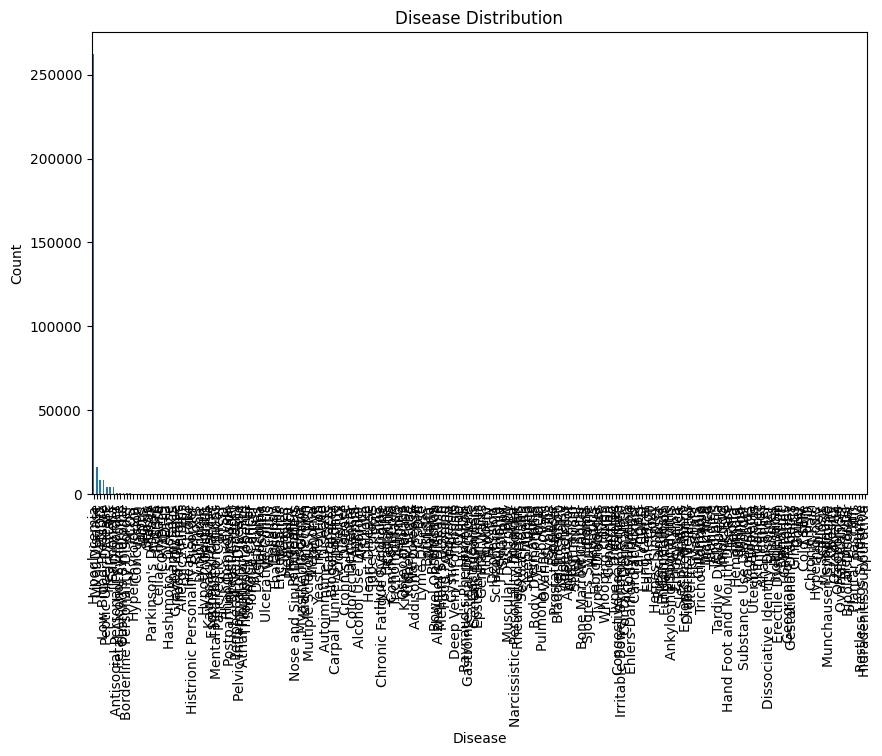

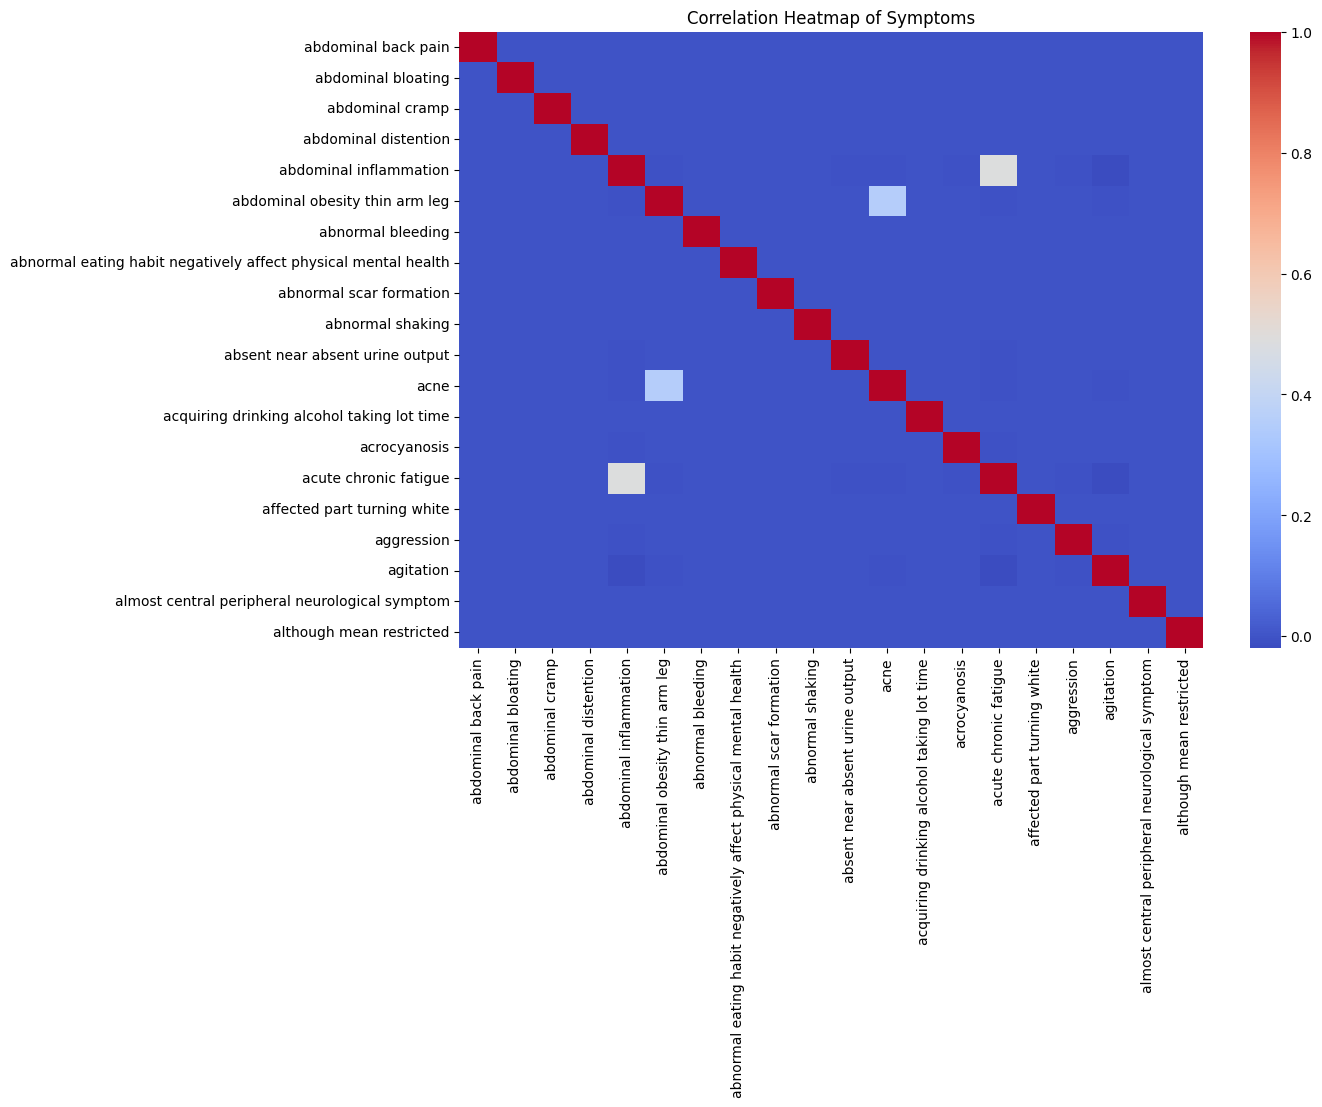

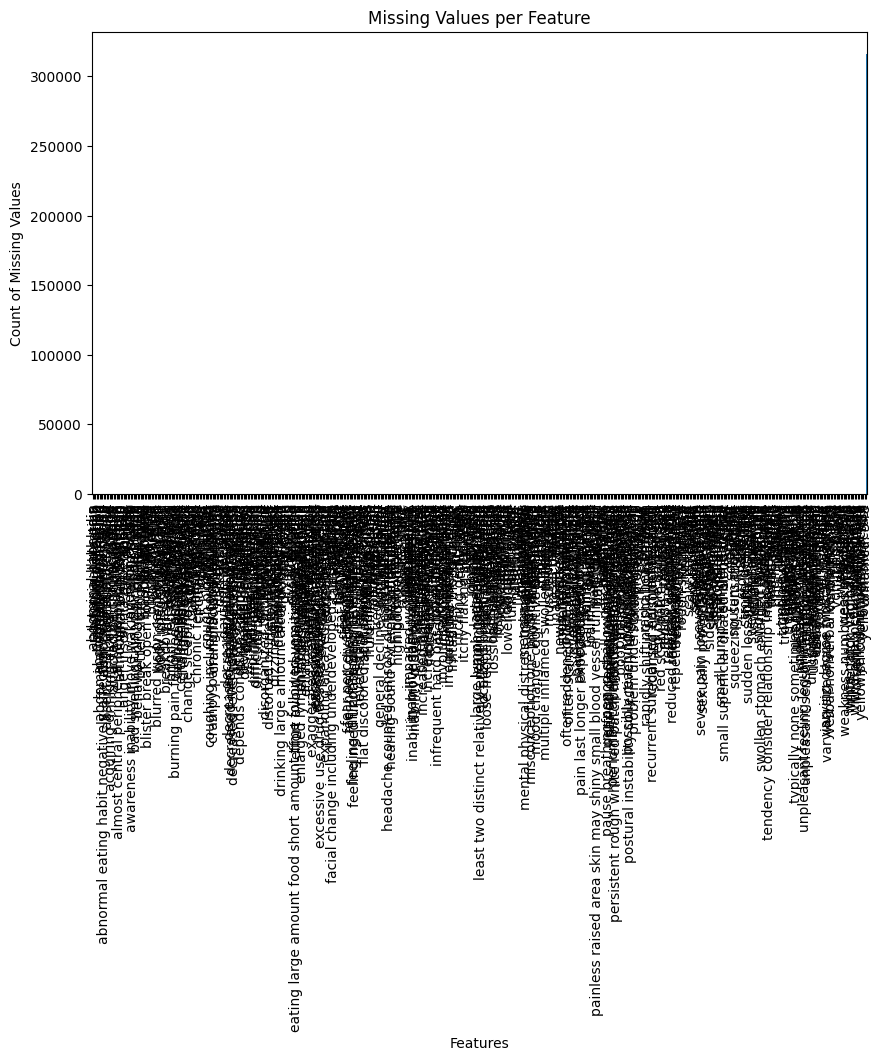

In [5]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(10, 6))
# data['label_dis'].value_counts().plot(kind='bar')
# plt.title('Disease Distribution')
# plt.xlabel('Disease')
# plt.ylabel('Count')
# plt.xticks(rotation=90)
# plt.show()

# plt.figure(figsize=(12, 8))
# sns.heatmap(data.iloc[:, 1:21].corr(), annot=False, cmap="coolwarm")
# plt.title('Correlation Heatmap of Symptoms')
# plt.show()

# missing_values = data.isnull().sum()
# plt.figure(figsize=(10, 6))
# missing_values.plot(kind='bar')
# plt.title('Missing Values per Feature')
# plt.xlabel('Features')
# plt.ylabel('Count of Missing Values')
# plt.show()

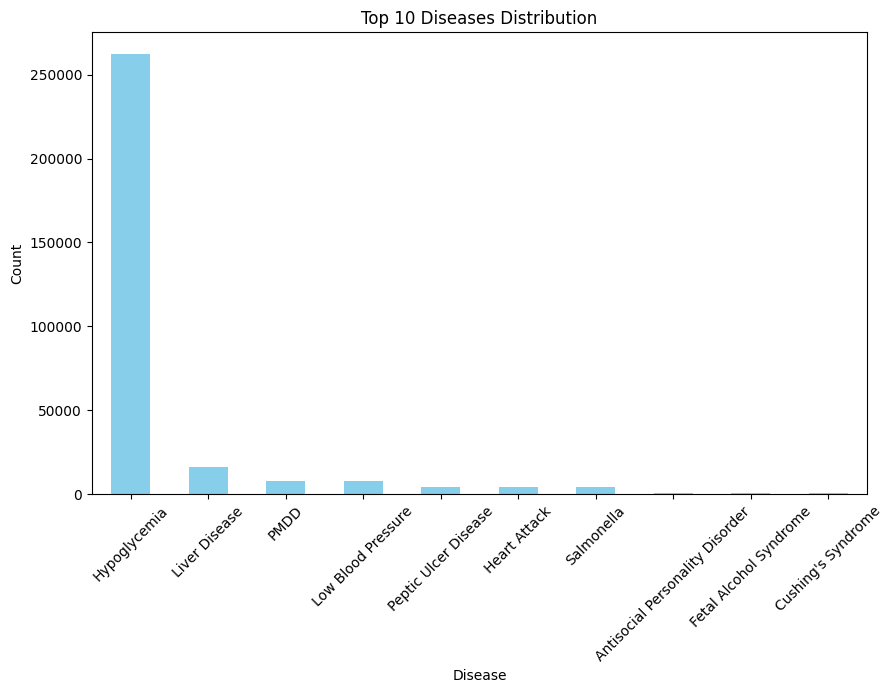

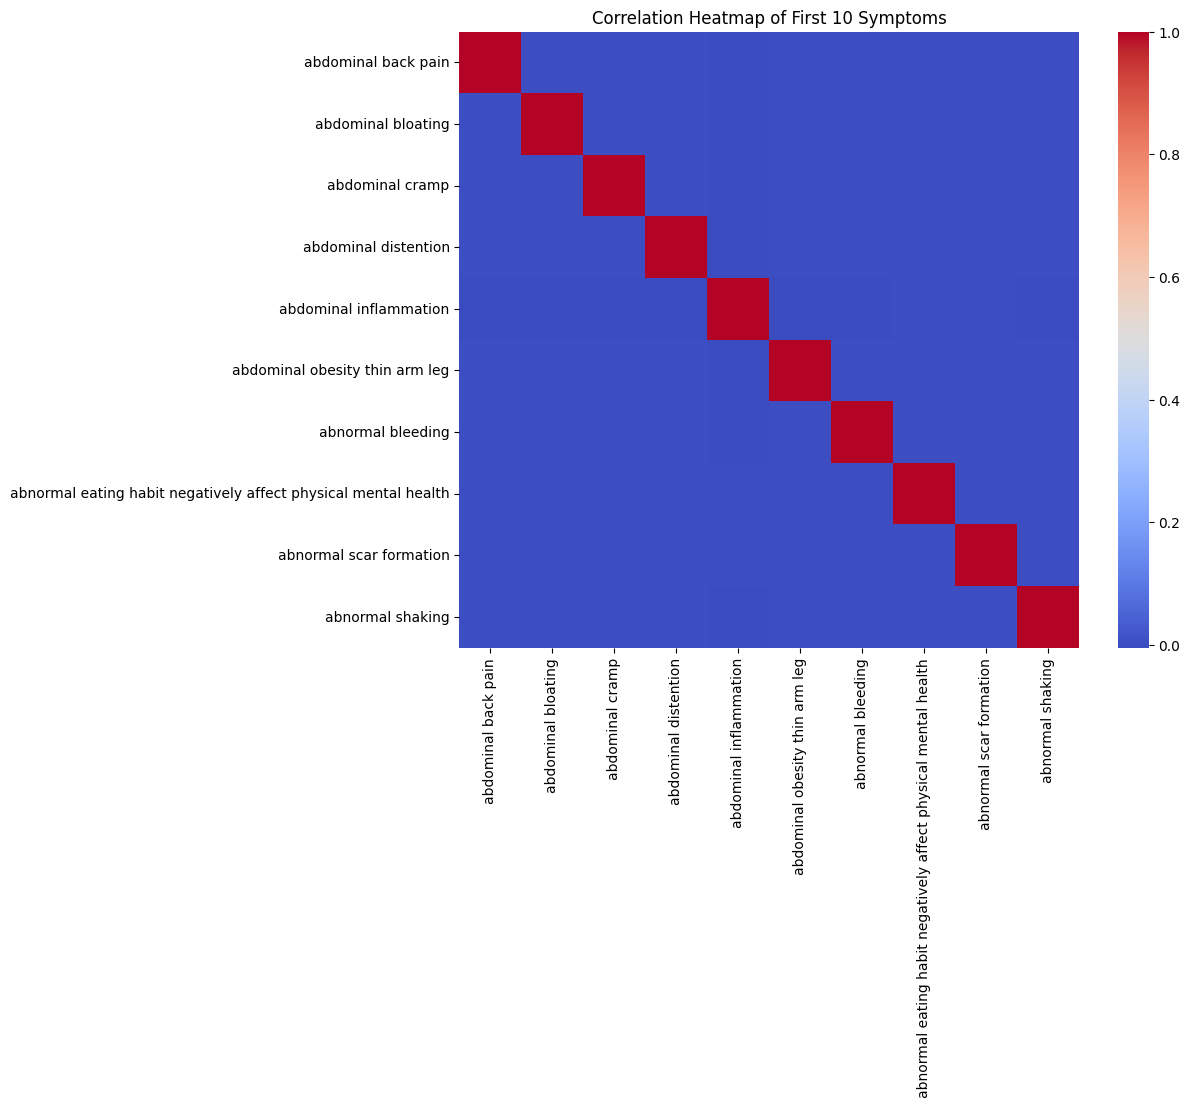

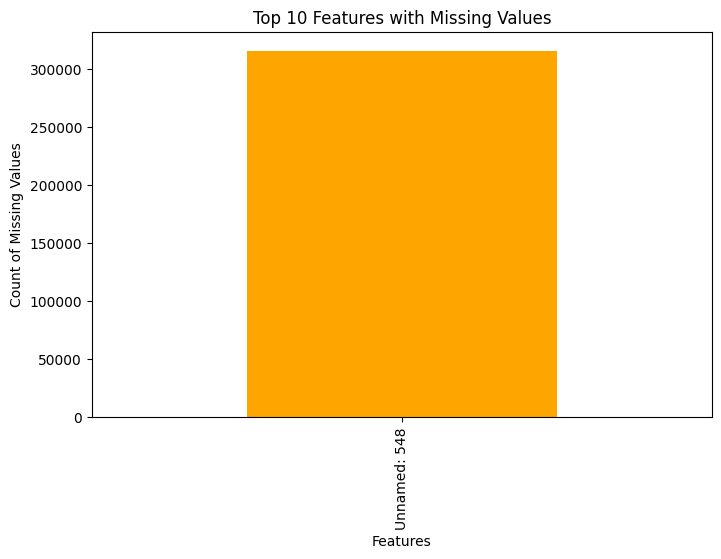

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#1. Distribution of the top 10 most frequent diseases
plt.figure(figsize=(10, 6))
top_diseases = data['label_dis'].value_counts().head(10)
top_diseases.plot(kind='bar', color='skyblue')
plt.title('Top 10 Diseases Distribution')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#2. Heatmap with correlation of first 10 symptoms
plt.figure(figsize=(10, 8))
sns.heatmap(data.iloc[:, 1:11].corr(), annot=False, cmap="coolwarm")
plt.title('Correlation Heatmap of First 10 Symptoms')
plt.show()

#3. Top 10 features with the most missing values
missing_values = data.isnull().sum()
top_missing = missing_values[missing_values > 0].sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 5))
top_missing.plot(kind='bar', color='orange')
plt.title('Top 10 Features with Missing Values')
plt.xlabel('Features')
plt.ylabel('Count of Missing Values')
plt.show()


In [ ]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data.shape

(8835, 490)

In [ ]:
X = data.iloc[:, 1:]
Y = data.iloc[:, 0:1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)
accuracy_list = []
model_list = []



In [ ]:
svm = SVC(kernel="rbf", probability=True)
svm.fit(x_train, y_train.values.ravel())
y_pred = svm.predict(x_test)
acc_svm = round(Decimal(accuracy_score(y_test, y_pred) * 100),2)
#accuracy = accuracy_score(y_test, y_pred)
accuracy_list.append(acc_svm)
model_list.append("SVM")
print(f"Accuracy: {acc_svm}%")

Accuracy: 86.98%


In [ ]:
rf = RandomForestClassifier(n_estimators=10, criterion="entropy")
rf.fit(x_train, y_train.values.ravel())

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
rf_pred = rf.predict(x_test)

In [ ]:
acc_rf = round(Decimal(accuracy_score(y_test, rf_pred) * 100), 2)
accuracy_list.append(acc_rf)
model_list.append("RF")
print(f"Accuracy: {acc_rf}%")

Accuracy: 86.42%


In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train.values.ravel())

DecisionTreeClassifier()

In [ ]:
dt_pred = dt.predict(x_test)

In [ ]:
acc_dt = round(Decimal(accuracy_score(y_test, dt_pred) * 100), 2)
accuracy_list.append(acc_dt)
model_list.append("DT")
print(f"Accuracy: {acc_dt}%")

Accuracy: 82.68%


In [ ]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train.values.ravel())

MultinomialNB()

In [ ]:
mnb_pred = mnb.predict(x_test)

In [ ]:
acc_mnb = round(Decimal(accuracy_score(y_test, mnb_pred) * 100), 2)
accuracy_list.append(acc_mnb)
model_list.append("MNB")
print(f"Accuracy (MNB) : {acc_mnb}%")

Accuracy (MNB) : 82.63%


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train.values.ravel())

KNeighborsClassifier()

In [ ]:
knn_pred = knn.predict(x_test)

In [ ]:
acc_knn = round(Decimal(accuracy_score(y_test, knn_pred) * 100) , 2)
accuracy_list.append(acc_knn)
model_list.append("KNN")
print(f"Accuracy (KNN) : {acc_knn}%")

Accuracy (KNN) : 83.87%


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(64, 64, 32), activation='relu', solver='adam', max_iter=50)
mlp.fit(x_train, y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(64, 64, 32), max_iter=50)

In [ ]:
mlp_pred = mlp.predict(x_test)
acc_mlp = round(Decimal(accuracy_score(y_test, mlp_pred) * 100), 2)
accuracy_list.append(acc_mlp)
model_list.append("MLP")
print(f"Accuracy (MLP) : {acc_mlp}%")

Accuracy (MLP) : 87.55%


In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Bar(
    x=model_list,
    y=accuracy_list,
    name='Accuracy',
    text=accuracy_list,
    textposition='auto'
))

#fig.add_trace(go.Bar(
 ##  y=cross_accuracy_list,
   # name='Cross-Val Accuracy',
    #text=cross_accuracy_list,
    #textposition='auto'
#))

fig.update_layout(
    title="Model Accuracy Comparison",
    xaxis_title="Models",
    yaxis_title="Accuracy",
    barmode='group',
    template='plotly_dark'
)

fig.show()